In [1]:
#!/bin/python3
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import copy

In [2]:
#filename = "comb_syst_unc_iso.txt"
#filename = "comb_rates_iso.txt"
filename = "final_comb_loop_iso_corr.txt"
cols = ["datatype", "targettype", "runID", "energy"]
for i in range(400):
    cols.append("iso_cs_"+str(i))

df = pd.read_csv(filename,sep='\t',names=cols)


In [3]:
print(df)

   datatype targettype      runID  energy  iso_cs_0  iso_cs_1  iso_cs_2  \
0       exp     c_1086  0181_0001     400  0.994281  0.994254  0.994146   
1       exp     c_1086  0101_0001     550  0.993650  0.993606  0.993476   
2       exp     c_1086  0127_0001     650  0.996822  0.996791  0.996760   
3       exp     c_1086  0168_0001     800  0.994452  0.994405  0.994335   
4       exp     c_2198  0183_0001     400  0.987941  0.987861  0.987808   
5       exp     c_2198  0103_0001     550  0.989149  0.989101  0.989029   
6       exp     c_2198  0130_0001     650  0.991985  0.991872  0.991823   
7       exp     c_2198  0170_0001     800  0.990660  0.990490  0.990471   
8       exp       c_54  0179_0001     400  0.996836  0.996822  0.996795   
9       exp       c_54  0099_0001     550  0.996722  0.996702  0.996681   
10      exp       c_54  0126_0001     650  0.997550  0.997536  0.997522   
11      exp       c_54  0166_0001     800  0.995946  0.995911  0.995894   
12      exp      empty  0

In [4]:
df.shape

(16, 404)

In [5]:
last_400_columns = df.iloc[:, -400:-100]  # Select the last 400 columns
print(last_400_columns)

    iso_cs_0  iso_cs_1  iso_cs_2  iso_cs_3  iso_cs_4  iso_cs_5  iso_cs_6  \
0   0.994281  0.994254  0.994146  0.994119  0.994119  0.994078  0.994064   
1   0.993650  0.993606  0.993476  0.993410  0.993302  0.993280  0.993258   
2   0.996822  0.996791  0.996760  0.996760  0.996745  0.996729  0.996667   
3   0.994452  0.994405  0.994335  0.994311  0.994311  0.994288  0.994241   
4   0.987941  0.987861  0.987808  0.987755  0.987715  0.987648  0.987608   
5   0.989149  0.989101  0.989029  0.988933  0.988813  0.988717  0.988645   
6   0.991985  0.991872  0.991823  0.991662  0.991565  0.991532  0.991419   
7   0.990660  0.990490  0.990471  0.990395  0.990282  0.990187  0.990054   
8   0.996836  0.996822  0.996795  0.996795  0.996781  0.996754  0.996740   
9   0.996722  0.996702  0.996681  0.996681  0.996681  0.996681  0.996661   
10  0.997550  0.997536  0.997522  0.997466  0.997410  0.997395  0.997395   
11  0.995946  0.995911  0.995894  0.995808  0.995808  0.995808  0.995774   
12  0.998522

In [6]:
print(type(last_400_columns))

<class 'pandas.core.frame.DataFrame'>


In [7]:
data_list = last_400_columns.iloc[0, :].tolist()

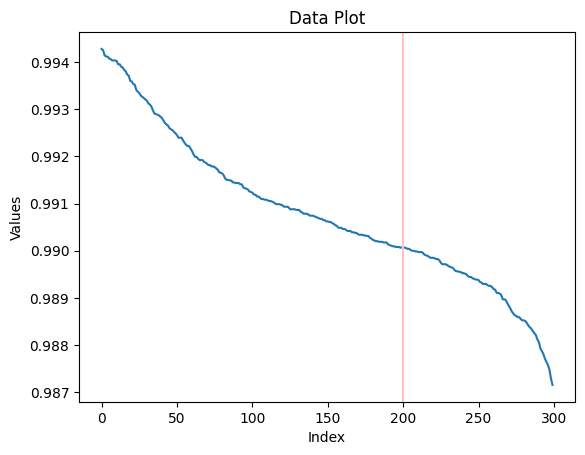

In [8]:
plt.plot(data_list)
plt.axvline(x = 200, color = 'pink', label = 'axvline - full height')
plt.title("Data Plot")
plt.xlabel("Index")
plt.ylabel("Values")
plt.show()


In [9]:
def iso_cc(ratio,target_thickness):
    targettype = None
    factor = None
    n_t = None
    delta_n_t = None
    new_density = 1.851
    T_2198 = (new_density)*(2.1928)*(6.02214076)*(pow(10,23))/(12.011);
    T_1086 = (new_density)*(1.0793)*(6.02214076)*(pow(10,23))/(12.011);
    T_54 = (new_density)*(0.5451)*(6.02214076)*(pow(10,23))/(12.011);
    if (target_thickness == "thin"):
        targettype = "c_54"
        factor = (1./T_54)*(pow(10,27))
        n_t = T_54
        delta_n_t = 0.000648
    if (target_thickness == "medium"):
        targettype = "c_1086"
        n_t = T_1086
        delta_n_t = 0.002620
        factor = (1./T_1086)*(pow(10,27))
    if (target_thickness == "thick"):
        targettype = "c_2198"
        n_t = T_2198
        delta_n_t = 0.000322
        factor = (1./T_2198)*(pow(10,27))
    iso_cs = factor*(-math.log(ratio))
    return iso_cs


energy_vals = ["400","550","650","800"]
v_thin = []
v_medium = []
v_thick = []
v_empty = []

cs_thin_list = []
cs_medium_list = []
cs_thick_list = []
fixed_empty = []
for ene in energy_vals:
    list_thin = (df.loc[(df["targettype"] == "c_54") & (df["energy"] == float(ene))]).iloc[0, -400:-100].tolist()
    list_medium = (df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))]).iloc[0, -400:-100].tolist()
    list_thick = (df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))]).iloc[0, -400:-100].tolist()
    list_empty = (df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]).iloc[0, -400:-100].tolist()
    fixed_empty.append(list_empty[199])
    r_list_thin = [x / list_empty[199] for x in list_thin]
    r_list_medium = [x / list_empty[199] for x in list_medium]
    r_list_thick = [x / list_empty[199] for x in list_thick]
    cs_thin = [iso_cc(x,"thin")  for x in r_list_thin]
    cs_medium = [iso_cc(x,"medium")  for x in r_list_medium]
    cs_thick = [iso_cc(x,"thick")  for x in r_list_thick]

    cs_thin_list.append(cs_thin)
    cs_medium_list.append(cs_medium)
    cs_thick_list.append(cs_thick)

    v_thin.append(list_thin)
    v_medium.append(list_medium)
    v_thick.append(list_thick)
    v_empty.append(list_empty)

print(fixed_empty)

[0.997198, 0.997474, 0.997812, 0.998271]


### now plot thin, medium, thick, empty ,all

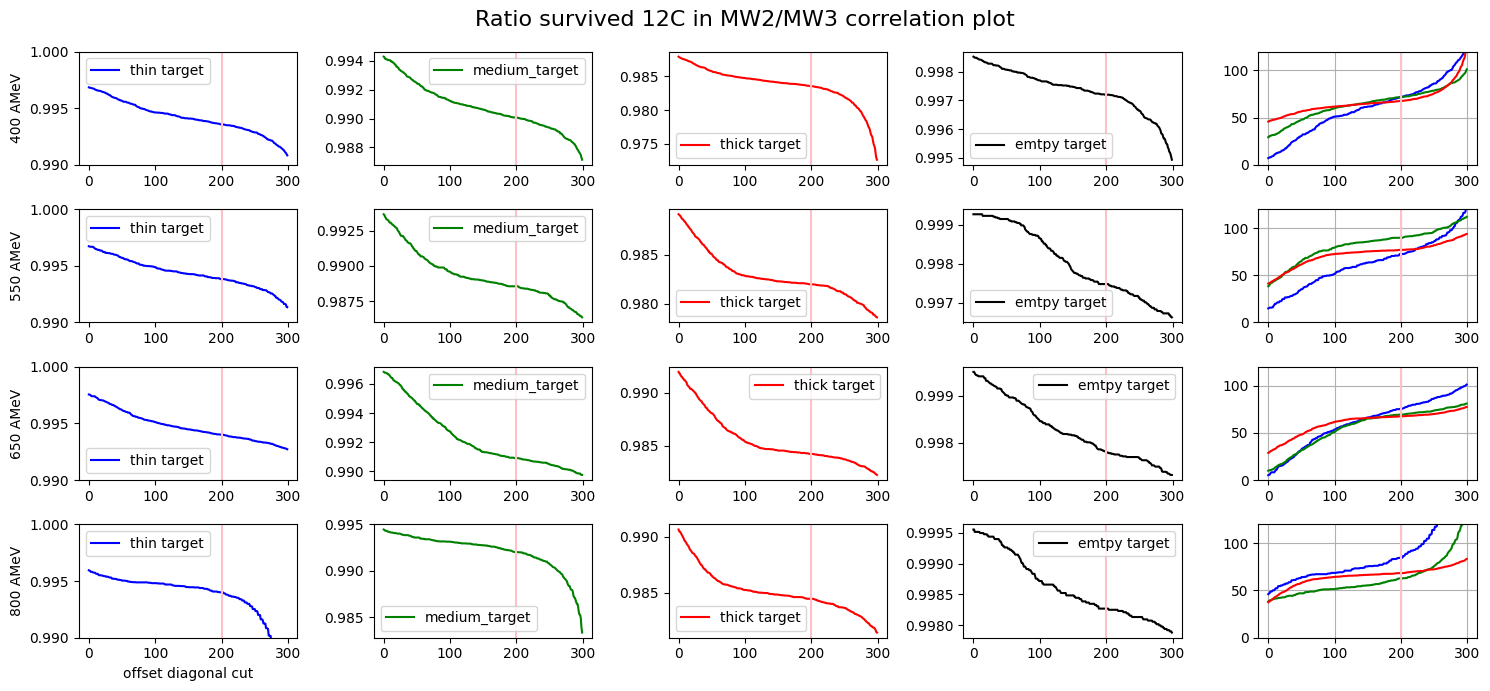

In [20]:
fig, ax = plt.subplots(4,5,figsize=(15,7))
fig.tight_layout()
fig.suptitle('Ratio survived 12C in MW2/MW3 correlation plot', fontsize=16)
fig.tight_layout()
for i in range(4):
    ax[i,0].plot(v_thin[i],color="blue",label="thin target")
    #ax[i,0].set_ylim(0.99,1)
    ax[i,1].plot(v_medium[i],color="green",label="medium_target")
    ax[i,2].plot(v_thick[i],color="red",label="thick target")
    ax[i,3].plot(v_empty[i],color="black",label="emtpy target")
   
    

    ax[i,4].plot(cs_thin_list[i],color="blue",label="thin target")
    ax[i,4].plot(cs_medium_list[i],color="green",label="medium_target")
    ax[i,4].plot(cs_thick_list[i],color="red",label="thick target")
    ax[i,4].grid()
    #ax[i,4].set_ylim(0,120)


ax[0,0].set_ylabel('400 AMeV')
ax[1,0].set_ylabel('550 AMeV')
ax[2,0].set_ylabel('650 AMeV')
ax[3,0].set_ylabel('800 AMeV')
ax[3,0].set_xlabel('offset diagonal cut')

for i in range(4):
    for j in range(5):
        ax[i,j].axvline(x = 200, color = 'pink')
        if j < 4:
            ax[i,j].legend()
fig.tight_layout()

(50.0, 150.0)

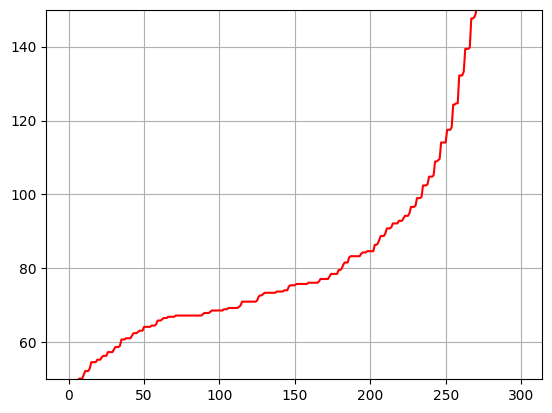

In [11]:
#plt.plot(v_thin[3],color="blue",label="thin target")
plt.plot(cs_thin_list[3],color="red",label="thick target")
plt.grid()
plt.ylim(50,150)

In [12]:
run_800_thin = (df.loc[(df["targettype"] == "c_54") & (df["energy"] == float(800))]).iloc[0, -300:-150].tolist()

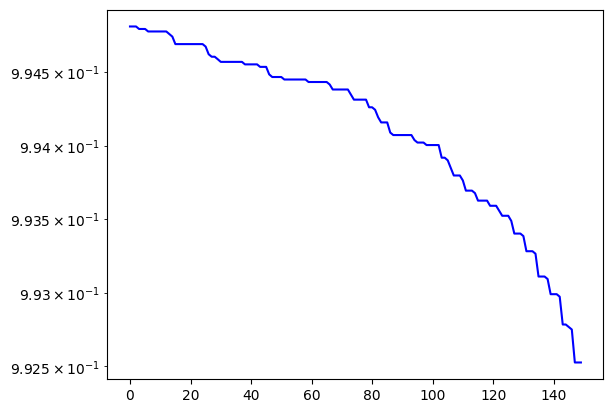

In [13]:
plt.plot(run_800_thin,color="blue",label="thin target")
plt.yscale("log")
